In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.3.0


In [5]:
data_dir='d2'

In [6]:
batch_size = 32
img_height = 128
img_width = 128

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

19907


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32,
)

Found 19907 files belonging to 9 classes.
Using 13935 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
 )

Found 19907 files belonging to 9 classes.
Using 5972 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4', '5', '6', '7', '8', '9']


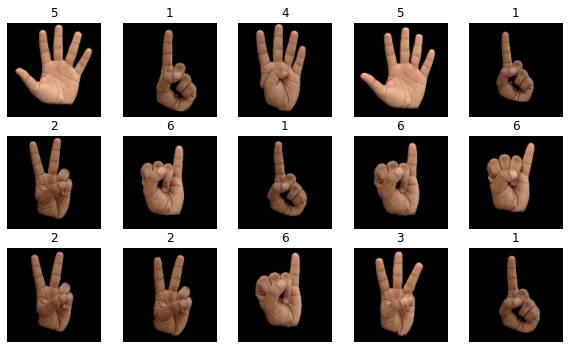

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = 9

In [15]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPool2D

model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3))) 
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [16]:
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy'])

In [17]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
436/436 [==============================] - 255s 585ms/step - loss: 0.2898 - accuracy: 0.9893 - val_loss: 2.6439e-06 - val_accuracy: 1.0000
Epoch 2/5
436/436 [==============================] - 244s 560ms/step - loss: 1.3851e-06 - accuracy: 1.0000 - val_loss: 7.7780e-07 - val_accuracy: 1.0000
Epoch 3/5
436/436 [==============================] - 242s 555ms/step - loss: 5.6399e-07 - accuracy: 1.0000 - val_loss: 4.2567e-07 - val_accuracy: 1.0000
Epoch 4/5
436/436 [==============================] - 248s 568ms/step - loss: 3.2114e-07 - accuracy: 1.0000 - val_loss: 2.6221e-07 - val_accuracy: 1.0000
Epoch 5/5
436/436 [==============================] - 242s 555ms/step - loss: 2.0381e-07 - accuracy: 1.0000 - val_loss: 1.7592e-07 - val_accuracy: 1.0000


In [18]:
model.save('Numbers_kaggle_dataset_segment')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Numbers_kaggle_dataset_segment\assets


In [19]:
model.save("Numbers_kaggle_dataset_segment.h5")

In [20]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('Numbers_kaggle_dataset_segment/') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Numbers_kaggle_dataset_segment.tflite', 'wb') as f:
  f.write(tflite_model)

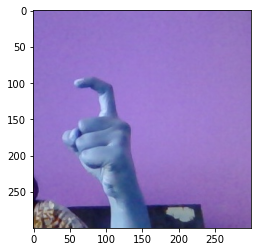

In [29]:
import keras
import imutils

path = '27.jpg'
image = cv2.imread("27.jpg")
#image = imutils.resize(image,width=250)
imgplot = plt.imshow(image)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (7, 7), 0)

        #resize img
image = cv2.resize(image, (128,128))
plt.show()
img = keras.preprocessing.image.load_img(
   path, target_size=(img_height, img_width)
)

In [30]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [31]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 6 with a 25.33 percent confidence.
